# Simple exercises with Shapely + OpenCV (may not end up using)

In [1]:
from shapely.geometry import Point, LineString, Polygon
import shapely
import numpy as np

# Create a point
p = Point(4, 5)
print("Point:", p)

# Create a line
line = LineString([(0, 0), (2, 3), (4, 5)])
geoms = np.array([Point(0, 0), Point(1, 1.5), Point(20,5)])
print(shapely.intersects(line, geoms))


print("Line length:", line.length)

# Create a polygon
polygon = Polygon([(0, 0), (4, 0), (4, 4), (0, 4)])
print("Polygon area:", polygon.area)
print("Polygon centroid:", polygon.centroid)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Point: POINT (4 5)
[ True  True False]
Line length: 6.433978400210179
Polygon area: 16.0
Polygon centroid: POINT (2 2)


In [2]:
import numpy as np
import cv2
from shapely.geometry import Polygon, LineString
from skimage.morphology import skeletonize

# Create a binary mask (simulated epithelium region)
mask = np.zeros((100, 100), dtype=np.uint8)
#it goes top left to bottom right and 255 is white (ROI) while zero is black (background) 
cv2.rectangle(mask, (20, 20), (80, 80), 255, -1)  # Simulated epithelium region

# Skeletonize the mask (find the centerline)
binary_mask = (mask > 0).astype(np.uint8)  # Ensure binary (0 or 1)
print("binary_mask", binary_mask)
#print with label 
skeleton = skeletonize(binary_mask)
print("skeleton", skeleton)
#print space before next output
print()
# Extract skeleton coordinates
skeleton_coords = np.column_stack(np.where(skeleton > 0))
print("skeleton_coords")
print(skeleton_coords)
print(skeleton_coords.shape)
print()
#it iterates through the skeleton_coords which are lists, then it splices the list starting from the end and then it converts it to a tuple
centerline = LineString([tuple(coord[::-1]) for coord in skeleton_coords])
print(centerline)
print("Centerline Length:", centerline.length)


binary_mask [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
skeleton [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

skeleton_coords
[[49 50]
 [49 51]
 [50 49]]
(3, 2)

LINESTRING (50 49, 51 49, 49 50)
Centerline Length: 3.23606797749979


# Loading the Data + getting areas

In [3]:
#loading the data BUT we do not have a WSI image...
import slideflow as sf
import matplotlib.pyplot as plt

# Load the Whole Slide Image (WSI) & ROIs
path = "/Users/sheeltanna/Cancer_Project_2025/Cancer_Project_2025/AG037F.svs"  # Adjust if needed
wsi = sf.WSI(path, 256, 128, rois='AG037F.csv')

# # Extract polygons
# rois = [roi.poly for roi in wsi.rois]  # List of Shapely Polygon objects

# # Print areas of each ROI
# for i, poly in enumerate(rois):
#     print(f"ROI {i+1} Area: {poly.area}")


[15:42:48] ERROR    Unable to load vips; slide processing will be unavailable. Error raised: cannot load library   
                    'libvips.42.dylib': dlopen(libvips.42.dylib, 0x0002): tried: 'libvips.42.dylib' (no such file),
                    '/System/Volumes/Preboot/Cryptexes/OSlibvips.42.dylib' (no such file),                         
                    '/Users/sheeltanna/opt/anaconda3/envs/datasci/bin/../lib/libvips.42.dylib' (no such file),     
                    '/usr/lib/libvips.42.dylib' (no such file, not in dyld cache), 'libvips.42.dylib' (no such     
                    file).  Additionally, ctypes.util.find_library() did not manage to locate a library called     
                    'libvips.42.dylib'

NameError: name 'vips' is not defined

In [4]:
#alternative method for loading the data
import pandas as pd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/Users/sheeltanna/Cancer_Project_2025/Cancer_Project_2025/AG037F.csv"
df = pd.read_csv(csv_path)

# Group points by ROI name
roi_polygons = {}
#note that groupby is grouping by the roi_name column
#note that group is just a subset of the dataframe corresponding to the roi_name
for roi_name, group in df.groupby("roi_name"):
    #taking the two series of x and y coordinates and zipping them together. Zip needs two interables and makes tuples
    points = list(zip(group["x_base"], group["y_base"]))  # Convert to (x, y) coordinates
    #adding to the dictionary
    roi_polygons[roi_name] = Polygon(points)  # Create Shapely Polygon

#pritning dictionary here
for roi, poly in roi_polygons.items():
    print(f"ROI {roi}: Area = {poly.area}, Length = {poly.length}")


ROI ROI_1: Area = 2502597.5, Length = 8623.268285663553
ROI ROI_11: Area = 9879624.5, Length = 20163.19792633279
ROI ROI_12: Area = 3941817.5, Length = 11004.80563576758
ROI ROI_13: Area = 6565540.0, Length = 19588.338142361168
ROI ROI_15: Area = 9916.0, Length = 582.7230085110544
ROI ROI_19: Area = 26920015.380076278, Length = 56012.26676270695
ROI ROI_20: Area = 17691922.5, Length = 40760.771033223624
ROI ROI_21: Area = 12163178.849726776, Length = 32331.874440477695
ROI ROI_3: Area = 1775078.5, Length = 5639.798155264295
ROI ROI_4: Area = 9701082.0, Length = 17040.48556076896
ROI ROI_6: Area = 9253181.0, Length = 11814.963681904235
ROI ROI_7: Area = 18724605.413780596, Length = 45251.76238768894


# Visualzing the polygons

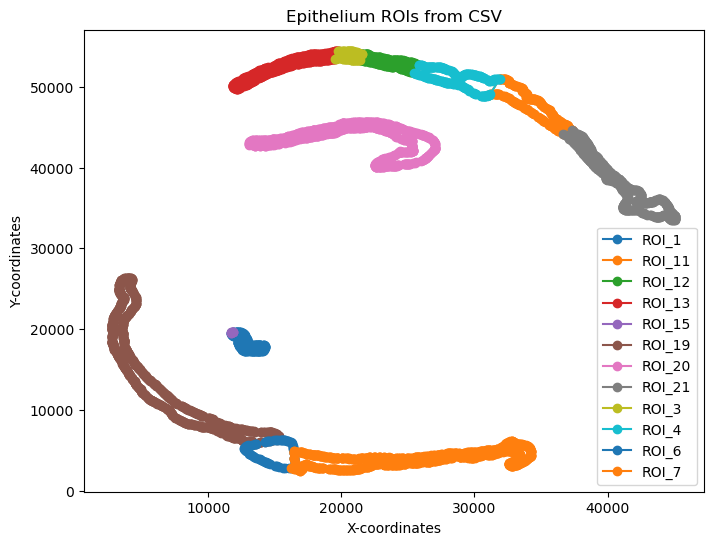

In [5]:
#visualizing the polygons
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each ROI polygon
#the .items provides tuples that we are interting through that represent the key value pairs in the dictionary
for roi_name, poly in roi_polygons.items():
    #gives two arrays of x and y coordinates
    x, y = poly.exterior.xy  # Extract X, Y coordinates
    ax.plot(x, y, linestyle="-", marker="o", label=roi_name)

plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")
plt.title("Epithelium ROIs from CSV")
plt.legend()
plt.show()


# Simple midpoint method
To get the centerline through the ROI which represent the epithelium region. 
Plotting midpoints shows method isn't finding entire line and some parallel lines running in wrong direction giving points in odd locations

True Centerline Length: 8523.608550212573


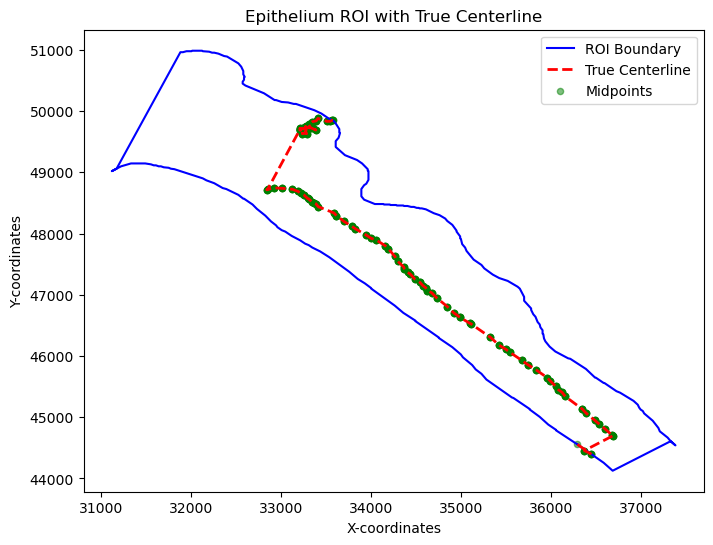

In [6]:
#getting centerline with simple method + visualizing it
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union
import numpy as np
import matplotlib.pyplot as plt

# Select an example ROI polygon
roi_polygon = roi_polygons["ROI_11"]  # Replace with different ROI if needed

# Step 1: Get equally spaced points along the exterior
num_points = 1000  # Adjust for more precision
exterior_coords = np.array(roi_polygon.exterior.coords)
indices = np.linspace(0, len(exterior_coords) - 1, num_points, dtype=int)
sampled_points = exterior_coords[indices]

# Step 2: Find midpoints between opposite points on the boundary
midpoints = []
for i in range(len(sampled_points) // 2):
    x_mid = (sampled_points[i][0] + sampled_points[-(i + 1)][0]) / 2
    y_mid = (sampled_points[i][1] + sampled_points[-(i + 1)][1]) / 2
    midpoints.append((x_mid, y_mid))

# Step 3: Convert midpoints into a LineString
centerline = LineString(midpoints)

# Step 4: Measure the centerline length
print("True Centerline Length:", centerline.length)

# Step 5: Visualize ROI boundary and the extracted centerline
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROI boundary
x, y = roi_polygon.exterior.xy
ax.plot(x, y, linestyle="-", color="blue", label="ROI Boundary")

# Plot Centerline
x_c, y_c = centerline.xy
ax.plot(x_c, y_c, linestyle="--", color="red", linewidth=2, label="True Centerline")

# Plot midpoints
midpoints_array = np.array(midpoints)
ax.scatter(midpoints_array[:,0], midpoints_array[:,1], color='green', s=20, alpha=0.5, label='Midpoints')

plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")
plt.title("Epithelium ROI with True Centerline")
plt.legend()
plt.show()


# More complex voronoi method

Not terrible but lots of branching!! 
Tested multiple ROIs and the centerline always present but still lots of branching --> need to smooth

Voronoi Medial Axis Length: 15402.240325858382


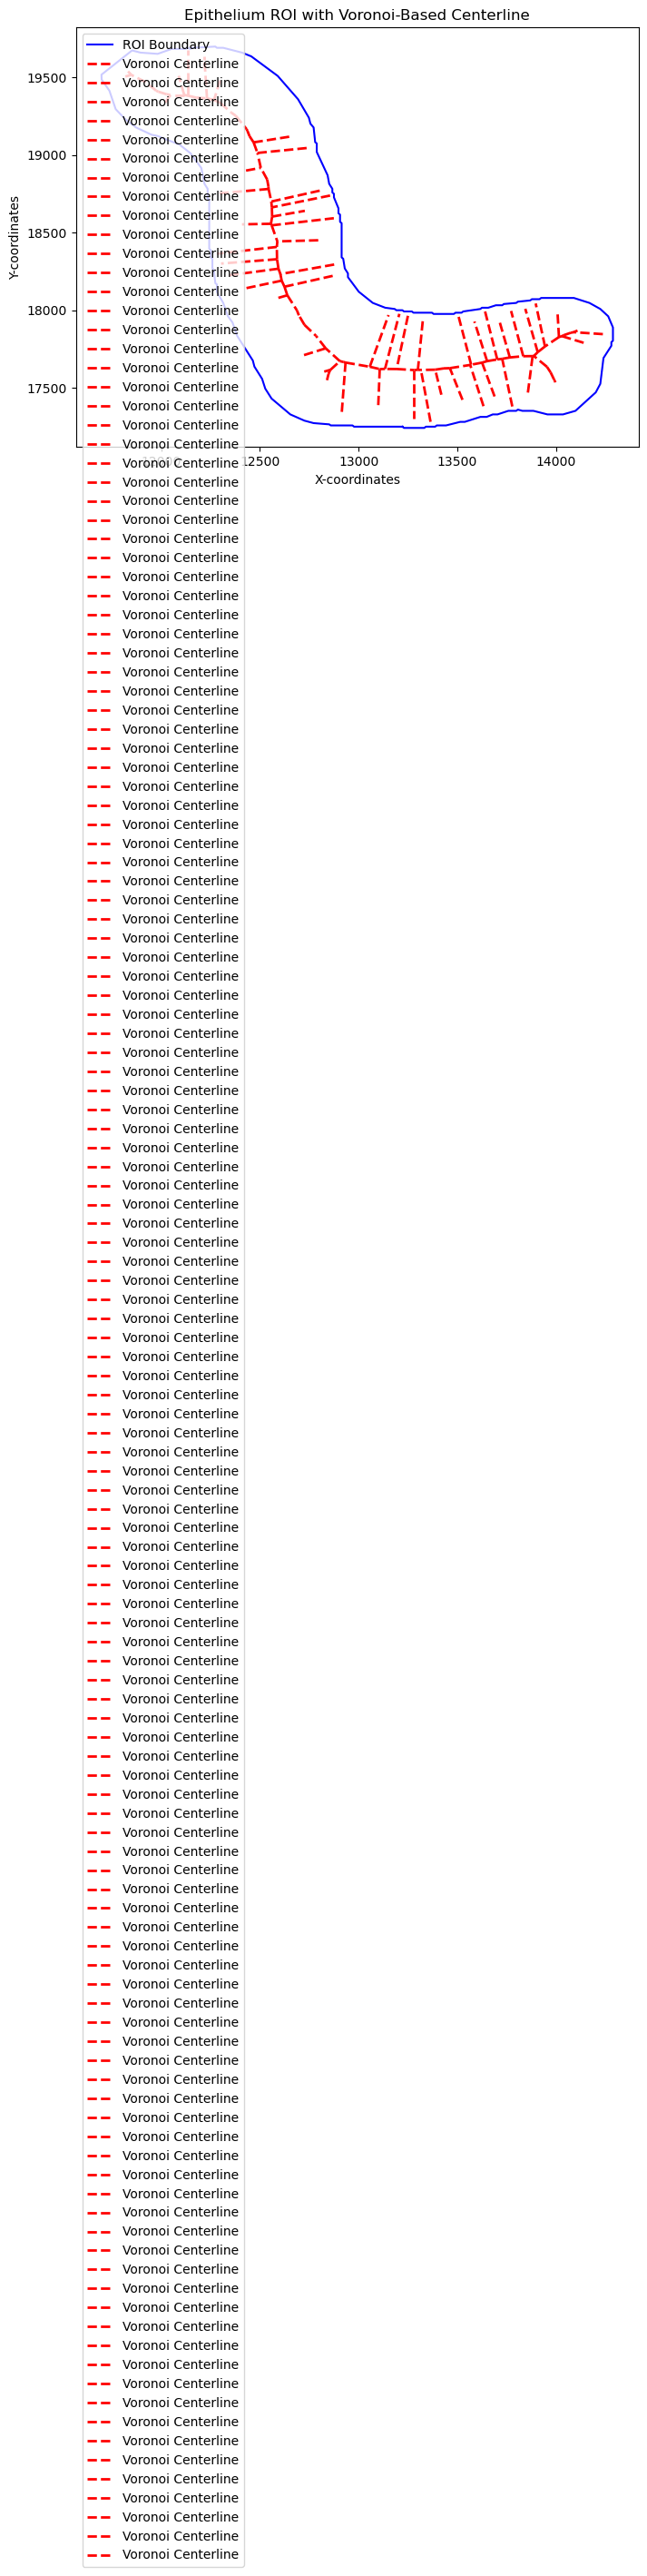

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString, Point
from shapely.ops import unary_union
from scipy.spatial import Voronoi

# Select an example ROI polygon
roi_polygon = roi_polygons["ROI_1"]  # Replace with different ROI if needed

# Step 1: Extract boundary points from the polygon
boundary_coords = np.array(roi_polygon.exterior.coords)

# Step 2: Compute Voronoi diagram from boundary points
vor = Voronoi(boundary_coords)

# Step 3: Extract Voronoi edges and filter only those inside the polygon
valid_lines = []
for vpair in vor.ridge_vertices:
    if -1 in vpair:  # Ignore edges that extend to infinity
        continue
    p1, p2 = vor.vertices[vpair[0]], vor.vertices[vpair[1]]
    line = LineString([p1, p2])
    
    # Keep the line only if it's fully inside the polygon
    if roi_polygon.contains(line):
        valid_lines.append(line)

# Step 4: Merge all valid Voronoi lines into a single MultiLineString
medial_axis = unary_union(valid_lines)

# Step 5: Compute centerline length
print("Voronoi Medial Axis Length:", medial_axis.length)

# Step 6: Plot the ROI and the extracted medial axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROI boundary
x, y = roi_polygon.exterior.xy
ax.plot(x, y, linestyle="-", color="blue", label="ROI Boundary")

# Plot Centerline (Medial Axis)
if isinstance(medial_axis, MultiLineString):
    for line in medial_axis.geoms:
        x_c, y_c = line.xy
        ax.plot(x_c, y_c, linestyle="--", color="red", linewidth=2, label="Voronoi Centerline")
else:
    x_c, y_c = medial_axis.xy
    ax.plot(x_c, y_c, linestyle="--", color="red", linewidth=2, label="Voronoi Centerline")

plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")
plt.title("Epithelium ROI with Voronoi-Based Centerline")
plt.legend()
plt.show()


# Vornoi with Filtering
Promising results but some have branches/not complete. Need to understand vornoi and then this before tinkering. 

Refined Centerline Length: 3732.5898514841774


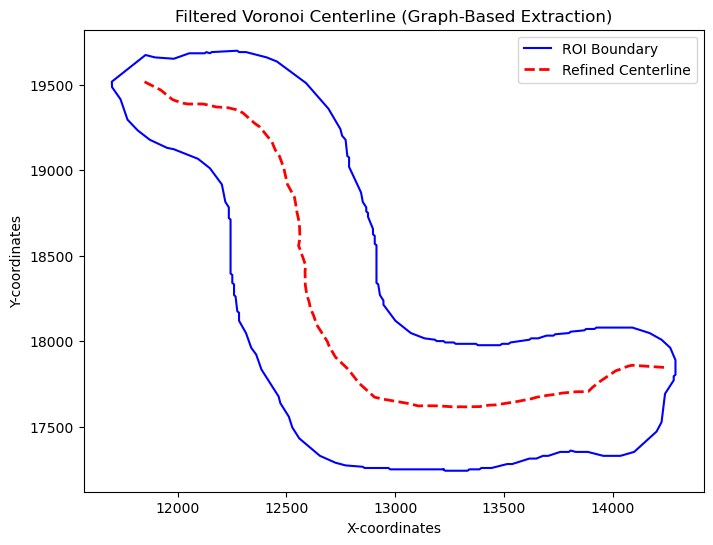

In [23]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union
from scipy.spatial import Voronoi

# Select an example ROI polygon
roi_polygon = roi_polygons["ROI_1"]  # Change for different ROIs

# Step 1: Extract boundary points from the polygon
boundary_coords = np.array(roi_polygon.exterior.coords)

# Step 2: Compute Voronoi diagram from boundary points
vor = Voronoi(boundary_coords)

# Step 3: Extract Voronoi edges and filter those inside the polygon
valid_lines = []
for vpair in vor.ridge_vertices:
    if -1 in vpair:  # Ignore infinite edges
        continue
    p1, p2 = vor.vertices[vpair[0]], vor.vertices[vpair[1]]
    line = LineString([p1, p2])
    
    # Keep only lines fully inside the polygon
    if roi_polygon.contains(line):
        valid_lines.append(line)

# Merge valid lines into a single geometry
medial_axis = unary_union(valid_lines)

# Step 4: Convert Medial Axis to a Graph (For Merging Components)
def medial_axis_to_graph(medial_axis):
    """Convert medial axis lines into a NetworkX graph."""
    G = nx.Graph()
    if isinstance(medial_axis, MultiLineString):
        for line in medial_axis.geoms:
            coords = list(line.coords)
            for i in range(len(coords) - 1):
                G.add_edge(coords[i], coords[i + 1], weight=line.length)
    elif isinstance(medial_axis, LineString):
        coords = list(medial_axis.coords)
        for i in range(len(coords) - 1):
            G.add_edge(coords[i], coords[i + 1], weight=medial_axis.length)
    return G

# Convert to graph
G = medial_axis_to_graph(medial_axis)

# Step 5: Extract the Largest Connected Component
largest_cc = max(nx.connected_components(G), key=len)  # Largest cluster
G_largest = G.subgraph(largest_cc).copy()

# Step 6: Find the Longest Path in the Largest Connected Component (Fix Applied!)
if len(G_largest.nodes) > 0:
    start_node = max(G_largest.nodes, key=lambda x: G_largest.degree[x], default=None)
    if start_node:
        # Find the farthest node from the start node
        end_node = max(G_largest.nodes, key=lambda x: nx.shortest_path_length(G_largest, start_node, x), default=None)
        if end_node:
            longest_path = nx.shortest_path(G_largest, source=start_node, target=end_node)
            centerline = LineString(longest_path)
        else:
            print("No valid endpoint found.")
    else:
        print("No valid start node found.")
else:
    print("Graph is empty after filtering.")


# Convert path back to LineString
centerline = LineString(longest_path)

# Step 7: Compute and Print Centerline Length
print("Refined Centerline Length:", centerline.length)

# Step 8: Plot the ROI and the extracted centerline
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROI boundary
x, y = roi_polygon.exterior.xy
ax.plot(x, y, linestyle="-", color="blue", label="ROI Boundary")

# Plot Centerline
x_c, y_c = centerline.xy
ax.plot(x_c, y_c, linestyle="--", color="red", linewidth=2, label="Refined Centerline")

plt.xlabel("X-coordinates")
plt.ylabel("Y-coordinates")
plt.title("Filtered Voronoi Centerline (Graph-Based Extraction)")
plt.legend()
plt.show()
